In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

In [2]:
testfile='/home/xli/Documents/2-filter/File1out/test-matched-median.jp2'
img=cv2.imread(testfile)

In [3]:
def info(img8):
    print img8.dtype
    print img8.shape
    print type(img8)
    print np.max(img8)
    print np.min(img8)

In [4]:
info(img)

uint8
(22176, 27010, 3)
<type 'numpy.ndarray'>
255
20


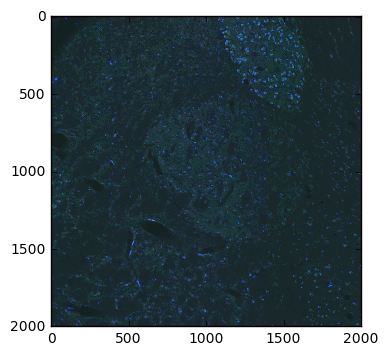

In [9]:
plt.imshow(img[10500:12500,10000:12000,:])
plt.show()

In [10]:
test16='/home/xli/testImages/PMD1463/PMD1464&1463-F33-2014.02.01-05.00.54_PMD1463_3_0099_lossless.jp2'
img16=cv2.imread(test16,-1)

In [11]:
data_raw=img16[10500:12500,10000:12000,:]

In [13]:
info(data_raw)

uint16
(2000, 2000, 3)
<type 'numpy.ndarray'>
733
0


In [17]:
data=data_raw.reshape([4000000,3])

In [27]:
info(data)

uint16
(4000000, 3)
<type 'numpy.ndarray'>
733
0


In [30]:
#######
y_redicted=KMeans(n_clusters = 3,max_iter=500,tol=0.001).fit_predict(data)

In [31]:
info(y_redicted)

int32
(4000000,)
<type 'numpy.ndarray'>
2
0


In [32]:
y_show=y_redicted * 128

In [34]:
y_show=y_show.reshape([2000,2000])

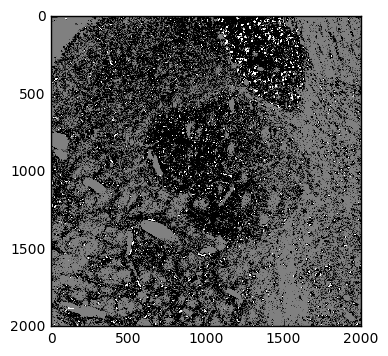

In [38]:
plt.imshow(y_show,cmap='gray')
plt.show()

In [39]:
cv2.imwrite('testimage.jp2',img[10500:12500,10000:12000,:])
cv2.imwrite('testimage_class.jp2',y_show)

True

In [40]:
info(y_show)

int32
(2000, 2000)
<type 'numpy.ndarray'>
256
0


In [41]:
#subtraction
mask = y_show[:,:]==256
testimage=np.copy(img[10500:12500,10000:12000,:])
testimage[mask] = 0
cv2.imwrite('testimage_subtract.jp2',testimage)

True

In [45]:
########
y_redicted=KMeans(n_clusters = 2,max_iter=500,tol=0.0001).fit_predict(data)

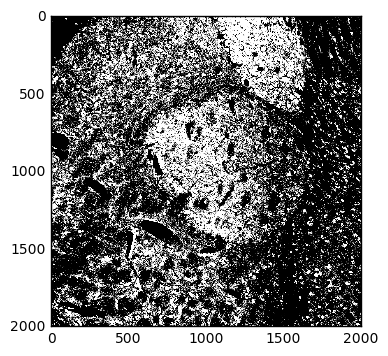

In [46]:
y_show=y_redicted * 255
y_show=y_show.reshape([2000,2000])
plt.imshow(y_show,cmap='gray')
plt.show()

In [47]:
#try whole image
data=img16.reshape([img16.shape[0]*img16.shape[1], 3])

In [48]:
info(data)

uint16
(598973760, 3)
<type 'numpy.ndarray'>
4095
0


In [52]:
y_redicted=KMeans(n_clusters = 8,max_iter=300,tol=0.0001).fit_predict(data)

KeyboardInterrupt: 

In [51]:
y_show=y_redicted * 255
y_show=y_show.reshape([img16.shape[0],img16.shape[1]])
cv2.imwrite('test-2cluster.jp2',y_show)

True